# Some RCT Examples

One of the earliest randomized experiments were the Polio vaccination trials conducted by the Public Health Service in 1954.  The question was whether Salk vaccine prevented polio.  Children in the study were randomly assigned either a treatment (polio vaccine shot) or a placebo (saline solution shot), without knowing which one they received. The doctors in the study, making the diagnosis, did not know whether a child received a vaccine or not. In other words, the trial was a double-blind, randomized control trial.  The trial had to be large, because the rate at which Polio occured in the population was 50 per 100,000.  The treatment group saw 33 polio cases per 200,745; the control group saw 115 cases per 201,229. The estimated avearage treatment effect is about

$$
-40
$$

with the 95% confidence band (based on approximate normality of the two sample means and their differences):

$$[-52, -28].$$

As this is an RCT, the confidence band suggests that the Polio vaccine **caused** the reduction in the risk of polio.

The interesting thing here is that we don't need the underlying individual data to evaluate the effectivess of the vaccine. This is because the outcomes are Bernoulli random variables, and we have enough information to compute the estimate of ATE as well as the confidence intervals from the group case counts.

We also compute the Vaccine Efficacy metric, which refers to the following measure according to the [CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html):

$$
VE = \frac{\text{Risk for Unvaccinated - Risk for Vaccinated}}{\text{Risk for Unvaccinated}}.
$$

It describes the relative reduction in risk caused by vaccination.


It is staightforward to get the VE estimate by just plugging-in the numbers, but how do we get the approximate variance estimate? I am too lazy to do calculations for the delta method, so I will just use a simulation (a form of approximate bootstrap) to obtain the confidence intervals.



Using github PAT from envvar GITHUB_PAT



Skipping install of 'ORCI' from a github remote, the SHA1 (7a946dbc) has not changed since last install.
  Use `force = TRUE` to force installation



[1] "Incidence per 100000 among treated: 16.4388"


[1] "Incidence per 100000 among controlled: 57.1488"


[1] "Estimated ATE of occurances per 100,000 is -40.7101"


[1] "Standard deviation for ATE is 6.0474"


[1] "95% confidence interval of ATE is [ -52.563 , -28.8571 ]"


[1] "Overall VE is 0.7124"


[1] "95% confidence interval of VE is [ 0.5903 , 0.8176 ]"


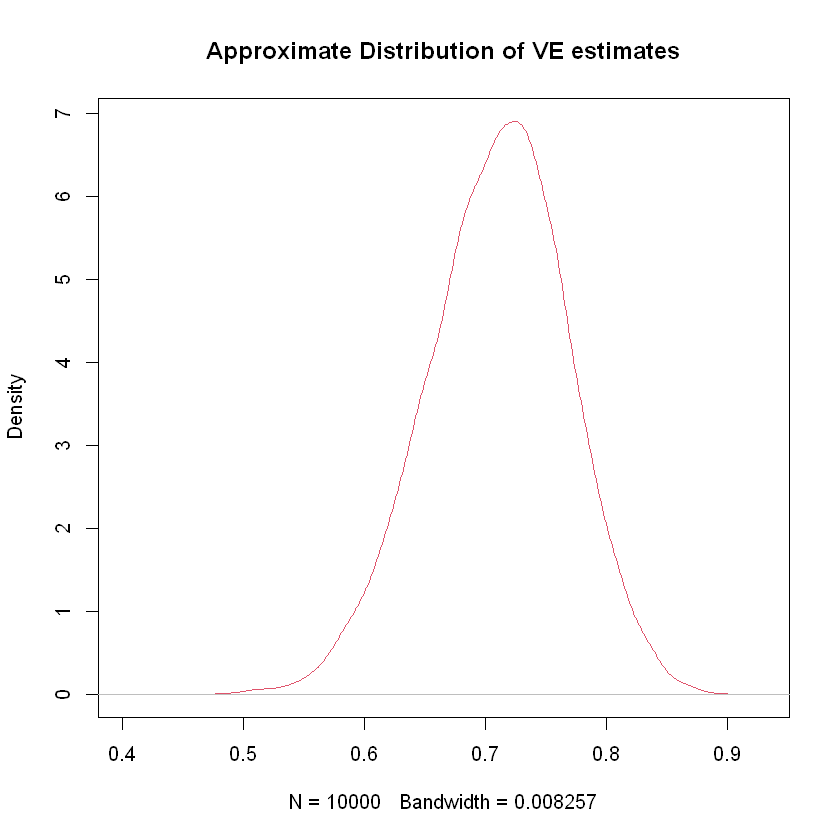

In [1]:
# install.packages("remotes", quiet = T)

remotes::install_github("cran/ORCI")

NV = 200745 # number of vaccinated (treated)
NU = 201229 # number of unvaccinated (control)
RV= 33/NV  # average outcome for vaccinated
RU =115/NU  # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

# incidence per 100000 
Incidence.RV=RV*100000
Incidence.RU=RU*100000

print(paste("Incidence per 100000 among treated:", round(Incidence.RV,4)))

print(paste("Incidence per 100000 among controlled:", round(Incidence.RU,4)))

# treatment effect - estimated reduction in incidence per 100000 people
delta.hat = 100000*(RV-RU)

print(paste("Estimated ATE of occurances per 100,000 is",  round(delta.hat,4)))

# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli
Var.RV = RV*(1-RV)/NV
Var.RU = RU*(1-RU)/NU
Var.delta.hat =  100000^2*(Var.RV + Var.RU)
Std.delta.hat = sqrt(Var.delta.hat)

print(paste("Standard deviation for ATE is", round(Std.delta.hat,4)))

CI.delta = c(delta.hat -1.96*sqrt(Var.delta.hat), 
             delta.hat +1.96*sqrt(Var.delta.hat))

print(paste("95% confidence interval of ATE is [", round(CI.delta[1],4), ",", 
            round(CI.delta[2],4), "]"   ))

print(paste("Overall VE is", round(VE,4) ))

# we use an approximate bootstrap to find the confidence interval of vaccine efficacy
# via Monte Carlo draws
set.seed(1)
B = 10000 # number of bootstraps
RVs = RV  + rnorm(B)*sqrt(Var.RV)
RUs = RU  + rnorm(B)*sqrt(Var.RU)
VEs= (RUs - RVs)/RUs

plot(density(VEs), col=2, main="Approximate Distribution of VE estimates")

CI.VE =  quantile(VEs, c(.025, .975)) # use the empirical quantiles from the bootstraps

print(paste("95% confidence interval of VE is [", round(CI.VE[1],4), ",", 
            round(CI.VE[2],4), "]"))

## Pfizer/BNTX Covid-19 RCT

Here is a link to the FDA [briefing](https://www.fda.gov/media/144245/download) and an interesting [discussion](
https://garycornell.com/2020/12/09/statistics-in-the-pfizer-data-how-good-is-the-vaccine/?fbclid=IwAR282lS0Vl3tWmicQDDhIJAQCMO8NIsCXyWbUWwTtPuKcnuJ2v0VWXRDQac), as well as data.

Pfizer/BNTX was the first vaccine approved for emergency use to reduce the risk of Covid-19 decease. In studies to assess vaccine efficacy, volunteers were randomly assigned to receive either a treatment (2-dose vaccination) or a placebo, without knowing which they recieved. The doctors making the diagnoses did not know now whether a given volunteer received a vaccination or not. The results of the study are given in the following table.

![](https://lh6.googleusercontent.com/oiO6gYom1UZyrOhgpFx2iq8ike979u3805JHiVygP-Efh1Yaz2ttyPcgWKlT1AqHDM4v46th3EPIkOvRLyXA0fNUloPL-mL9eOFmSAzfbNOHyCZSQ0DyzMhcFUtQuZ520R5Qd2lj):

Here we see both the overall effects and the effects by age group. The confidence intervals for the overall ATE are tight and suggest high effectiveness of the vaccine. The confidence intervals for the age group 65-75 are much wider due to the relatively small number of people in this group.  We could group 65-75 and >75 groups to evaluate the effectiveness of the vaccine for this broader age group and narrow the width of the confidence band. 

We use the same approach as that for the Polio example. This gives slightly different results than the FDA result, because the FDA used inversion of exact binomial tests to construct confidence intervals. We use asymptotic approches based on approximate normality, which is more crude, but delivers a rather similar result.


[1] "Incidence per 100000 among vaccinated: 45.0789"


[1] "Incidence per 100000 among unvaccinated: 837.795"


[1] "Estimated ATE of occurances per 100,000 is -792.7161"


[1] "Standard deviation for ATE is 65.9102"


[1] "95% confidence interval of ATE is [ -921.9 , -663.5322 ]"


[1] "Overall VE is 0.9462"


[1] "95% confidence interval of VE is [ 0.9086 , 0.9824 ]"


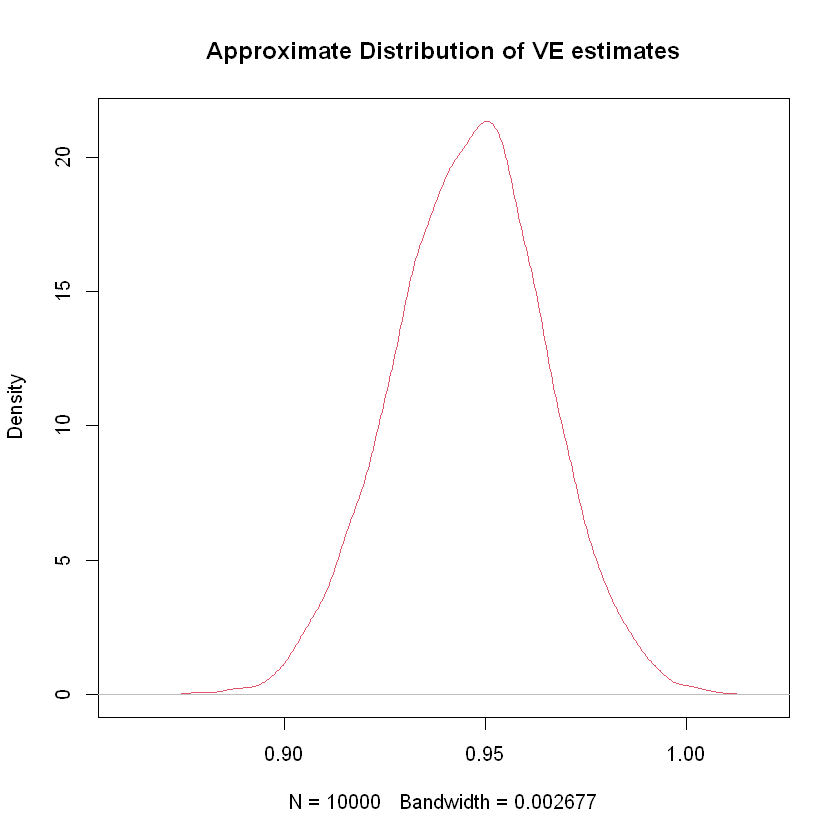

In [2]:
NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

# incidence per 100000
Incidence.RV=RV*100000
Incidence.RU=RU*100000

print(paste("Incidence per 100000 among vaccinated:", round(Incidence.RV,4)))

print(paste("Incidence per 100000 among unvaccinated:", round(Incidence.RU,4)))

# treatment effect - estimated reduction in incidence per 100000 people
delta.hat = 100000*(RV-RU)
      
print(paste("Estimated ATE of occurances per 100,000 is",  round(delta.hat,4)))
      
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli
Var.RV = RV*(1-RV)/NV
Var.RU = RU*(1-RU)/NU
Var.delta.hat =  100000^2*(Var.RV + Var.RU)
Std.delta.hat = sqrt(Var.delta.hat)

print(paste("Standard deviation for ATE is", round(Std.delta.hat,4)))

CI.delta = c(delta.hat -1.96*sqrt(Var.delta.hat), 
             delta.hat +1.96*sqrt(Var.delta.hat))

print(paste("95% confidence interval of ATE is [", round(CI.delta[1],4), ",", 
            round(CI.delta[2],4), "]"   ))

print(paste("Overall VE is", round(VE,4) ))
      
# we use an approximate bootstrap to find the VE confidence interval
# using Monte Carlo draws as before
set.seed(1)
B = 10000
RVs = RV  + rnorm(B)*sqrt(Var.RV)
RUs = RU  + rnorm(B)*sqrt(Var.RU)
VEs= (RUs - RVs)/RUs

plot(density(VEs), col=2, main="Approximate Distribution of VE estimates")

CI.VE = quantile(VEs, c(.025, .975))

print(paste("95% confidence interval of VE is [", round(CI.VE[1],4), ",", 
            round(CI.VE[2],4), "]" ))

In the code cell below  we calculate the effectiveness of the vaccine for the two groups that are 65 or older

[1] "Overall VE is 0.9471"


[1] "two-sided 95 % confidence interval is [ 0.816044705723917 , 1.0579357468458 ]"


[1] "one-sided 95 % confidence interval is [ 0.841513343789695 , 1 ]"


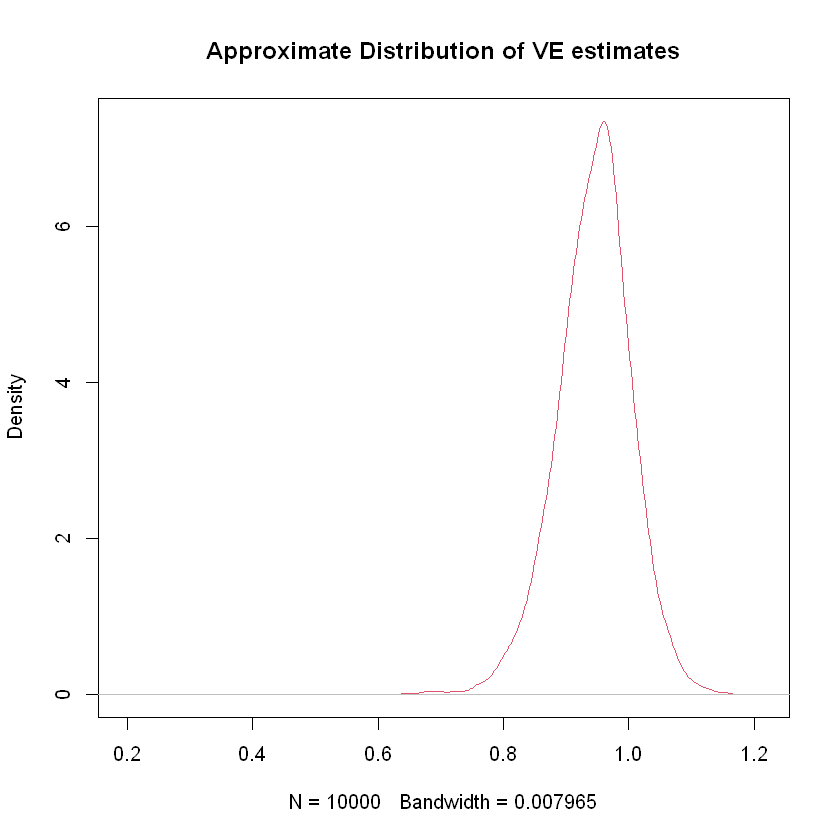

In [3]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

print(paste("Overall VE is", round(VE,4)) )

Var.RV = RV*(1-RV)/NV
Var.RU = RU*(1-RU)/NU

# As before, we use an approximate bootstrap to find the confidence intervals
# using Monte Carlo draws

set.seed(1)
B = 10000
    RVs = RV  + rnorm(B)*sqrt(Var.RV)+ 10^(-10)
    RUs = RU  + rnorm(B)*sqrt(Var.RU)+ 10^(-10)
    VEs= (RUs - RVs)/RUs

plot(density(VEs), col=2, main="Approximate Distribution of VE estimates")

CI.VE =  quantile(VEs, c(.025, .975))

print(paste("two-sided 95 % confidence interval is [", CI.VE[1], ",", 
            CI.VE[2], "]"   ))

OneSidedCI.VE =  quantile(VEs, c(.05))

print(paste("one-sided 95 % confidence interval is [", OneSidedCI.VE[1], ",", 
            1, "]"   ))

Let's try the parametric boostrap next, using the fact that the outcome is Bernouli.

[1] "Overall VE is 0.947069082201052"


[1] "two-sided 95 % confidence interval is [ 0.8 , 1 ]"


[1] "one-sided 95 % confidence interval is [ 0.833333333333333 , 1 ]"


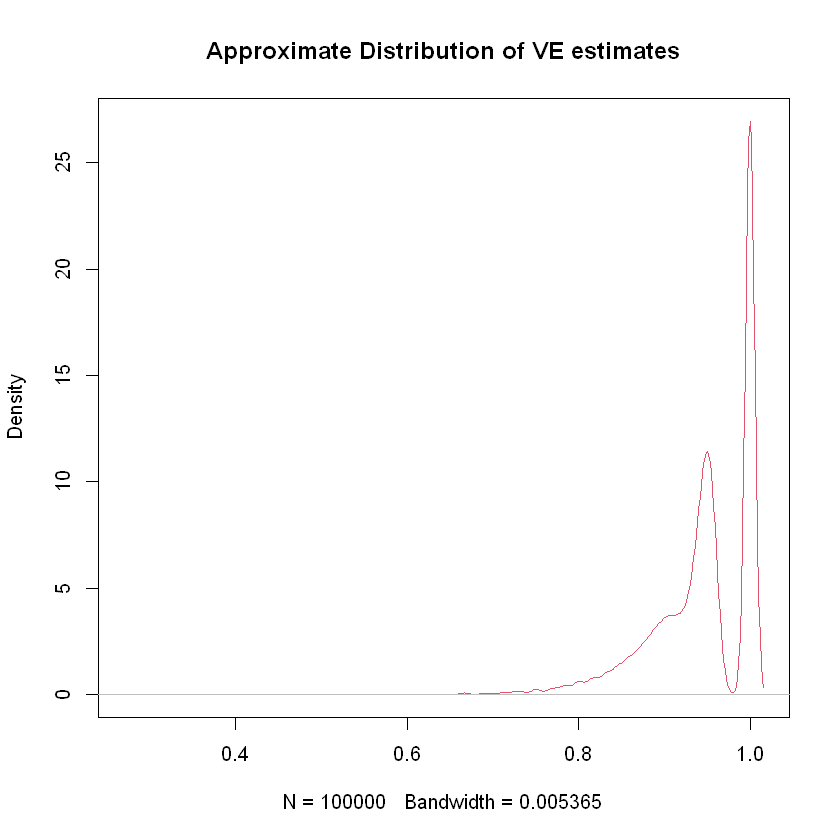

In [4]:
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

print(paste("Overall VE is", VE) )

set.seed(1)
B = 10000 #number of simulation draw
    RVs = rbinom(100000, size= NV, prob = RV) 
    RUs = rbinom(100000, size= NU, prob = RU)
    VEs= (RUs - RVs)/RUs

plot(density(VEs), col=2, main="Approximate Distribution of VE estimates")

CI.VE =  quantile(VEs, c(.025, .975))

print(paste("two-sided 95 % confidence interval is [", CI.VE[1], ",", 
            CI.VE[2], "]"   ))

OneSidedCI.VE =  quantile(VEs, c(.05))

print(paste("one-sided 95 % confidence interval is [", OneSidedCI.VE[1], ",",  1, "]"   ))

## Exact Binomial Test Inversion

It is possible to use exact inference by inverting tests based on the exact binomial nature of the outcome variable. Here, we perform the Cornfield Procedure to find the exact confidence interval on the estimate of vaccine efficacy. 

In [5]:
# Exact CI exploiting Bernoulli outcome using the Cornfield Procedure
library(ORCI)

NV =  19965;
NU =  20172;
RV = 9/NV;
RU = 169/NU;
VE = (RU - RV)/RU;

1- Cornfieldexact.CI(9, NV, 169, NU, conf = 0.95, interval = c(1e-08, 1e+08))

[1] 0.9760144 0.8962187

Note that this exactly recovers the result in the FDA table (first row).

Next we repeat the cornfield procedure to find the exact confidence interval on vaccine effectiveness for the two groups that are 65 or older. Here we see a big discrepancy between various asymptotic approaches and the exact finite-sample inference. This occurs because the binomial counts are too low for central limit theorems to work successfully.

In [6]:
# Exact CI exploiting Bernoulli outcome for the two groups that are 65 or older
library(ORCI)
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

1- Cornfieldexact.CI(1, NV, 19, NU, conf = 0.95, interval = c(1e-08, 1e+08))

[1] 0.9987277 0.6681290